In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("./student/student-por.csv", sep=";")  

X = data.drop(columns=["G3"]) 
y = data["G3"]

X = pd.get_dummies(X, drop_first=True)

joblib.dump(X.columns, "training_columns.pkl") 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, "scaler.pkl")  
joblib.dump(X.columns.tolist(), "columns.pkl")


['columns.pkl']

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
17/17 [==============================] - 0s 11ms/step - loss: 137.9544 - mae: 11.3137 - val_loss: 130.1883 - val_mae: 11.0155
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 104.1468 - mae: 9.7802 - val_loss: 89.7496 - val_mae: 9.0681
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 65.9123 - mae: 7.6566 - val_loss: 45.8314 - val_mae: 6.2813
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 29.5366 - mae: 4.8370 - val_loss: 15.7968 - val_mae: 3.3318
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 11.1470 - mae: 2.6556 - val_loss: 8.8212 - val_mae: 2.3434
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 7.1210 - mae: 2.0267 - val_loss: 7.2128 - val_mae: 2.0947
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 5.5021 - mae: 1.7455 - val_loss: 5.8806 - val_mae: 1.8892
Epoch 8/50
17/17 [==============================] - 0s 2ms/step - loss: 4.5

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))


RMSE: 1.6478424121816428
MAE: 0.9153846153846154


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


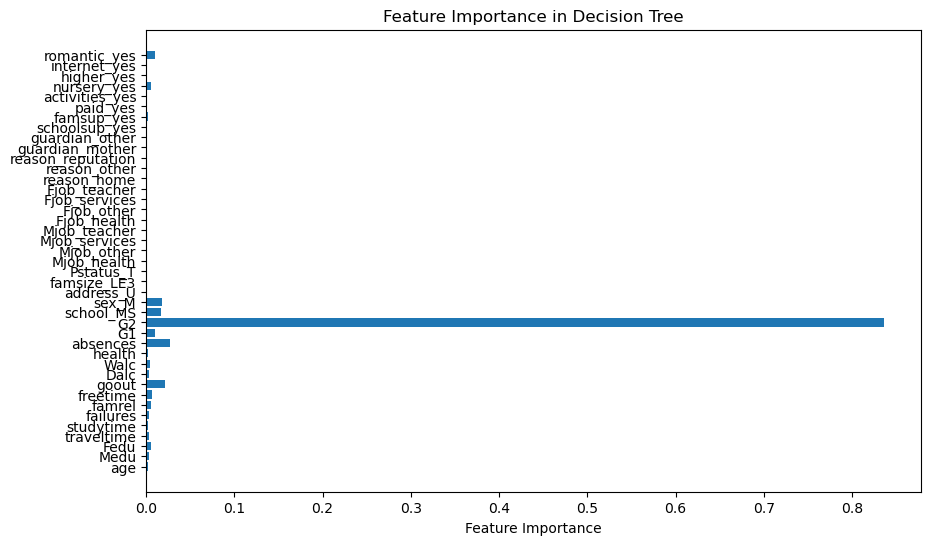

In [4]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = dt_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), X.columns)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree")
plt.show()


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


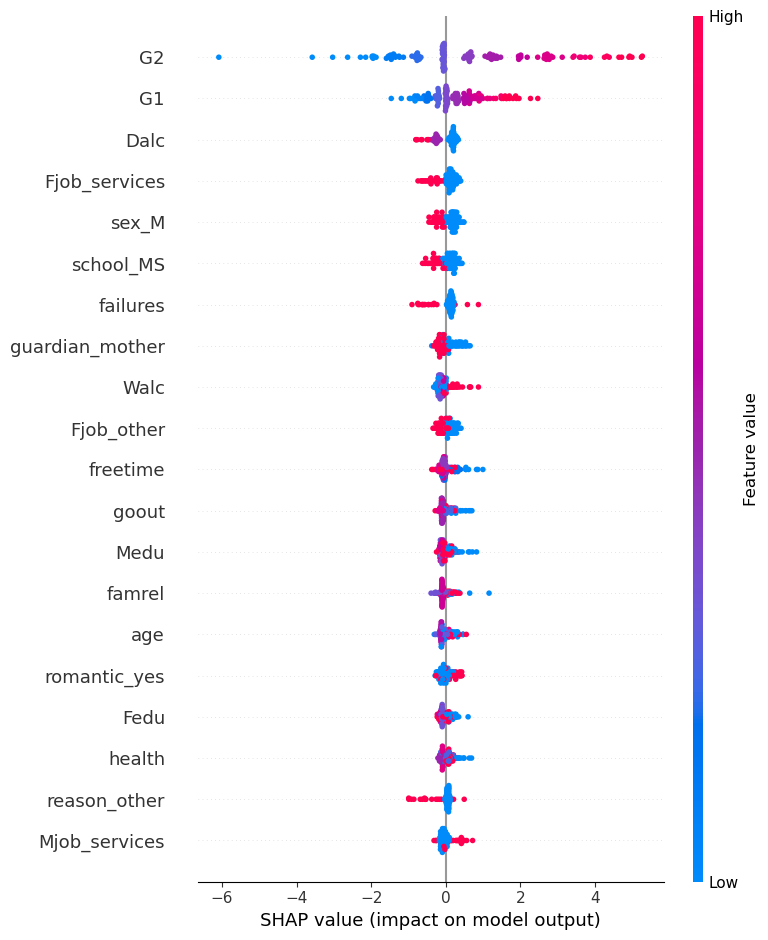

In [5]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [6]:
from tensorflow.keras.optimizers import Adam

learning_rates = [0.001, 0.0005, 0.01]
for lr in learning_rates:
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error', metrics=['mae'])
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
17/17 [==============================] - 0s 14ms/step - loss: 0.4724 - mae: 0.5370 - val_loss: 3.1717 - val_mae: 1.2386
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3936 - mae: 0.4853 - val_loss: 3.1563 - val_mae: 1.2429
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3538 - mae: 0.4661 - val_loss: 3.0929 - val_mae: 1.2248
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3545 - mae: 0.4640 - val_loss: 3.0964 - val_mae: 1.2323
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.3162 - mae: 0.4425 - val_loss: 3.2223 - val_mae: 1.2720
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2638 - mae: 0.3958 - val_loss: 3.2396 - val_mae: 1.2660
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2496 - mae: 0.3811 - val_loss: 3.2195 - val_mae: 1.2747
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 0.2179 - mae: 0.3

In [7]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
33/33 [==============================] - 1s 8ms/step - loss: 99.3580 - mae: 9.3481 - val_loss: 28.1146 - val_mae: 4.6520
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 11.1822 - mae: 2.4575 - val_loss: 4.8144 - val_mae: 1.6431
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 4.4014 - mae: 1.4942 - val_loss: 3.1108 - val_mae: 1.2707
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 3.2526 - mae: 1.2488 - val_loss: 2.9333 - val_mae: 1.2360
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 2.7125 - mae: 1.1521 - val_loss: 2.9033 - val_mae: 1.2235
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 2.3307 - mae: 1.0485 - val_loss: 2.7762 - val_mae: 1.1948
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 2.0417 - mae: 0.9942 - val_loss: 2.7822 - val_mae: 1.2092
Epoch 8/50
33/33 [==============================] - 0s 3ms/step - loss: 1.7675 - mae: 0

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

optimized_dt_model = DecisionTreeRegressor(**best_params)
optimized_dt_model.fit(X_train, y_train)


Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)

In [9]:
y_pred_ann = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_ann = mean_squared_error(y_test, y_pred_ann, squared=False)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("ANN Performance:")
print("RMSE:", rmse_ann)
print("MAE:", mae_ann)
print("R²:", r2_ann)


5/5 [==============================] - 0s 1ms/step
ANN Performance:
RMSE: 1.7942762738176863
MAE: 1.3179683281825139
R²: 0.6698604226112366


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
y_pred_dt = optimized_dt_model.predict(X_test)

rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("RMSE:", rmse_dt)
print("MAE:", mae_dt)
print("R²:", r2_dt)


Decision Tree Performance:
RMSE: 1.3886391985305684
MAE: 0.791194122266997
R²: 0.8022585124119805


c:\Users\Paul\anaconda3\envs\AI-env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- decision tree is better since RSME and MAE is lower and R^2 is higher

In [11]:
import joblib

joblib.dump(optimized_dt_model, "decision_tree_model.pkl")

['decision_tree_model.pkl']

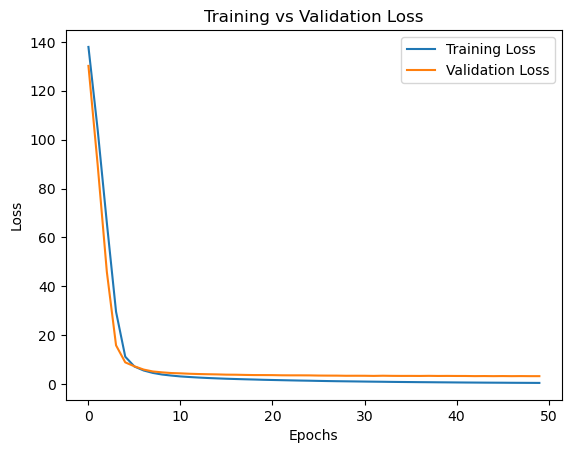

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
